In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

/usr/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:2053: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


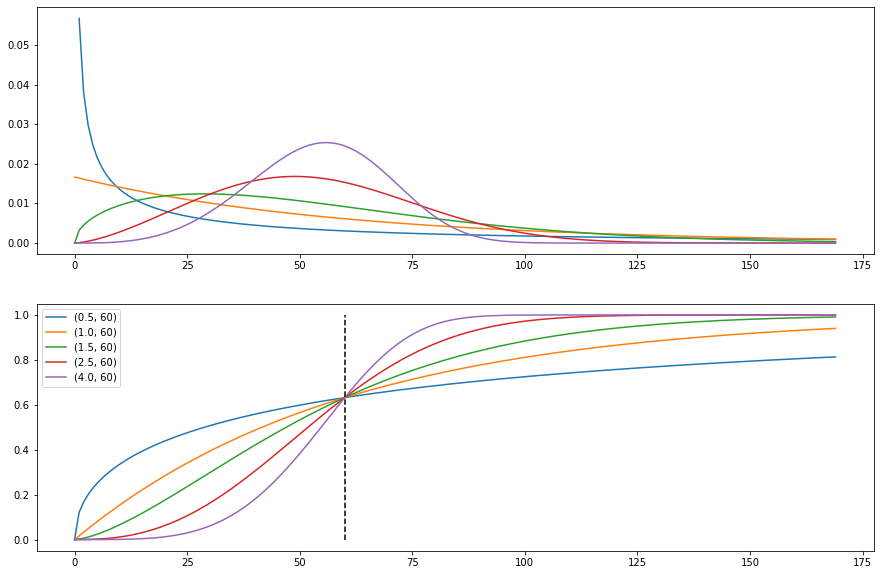

In [48]:
plt.gcf().set_size_inches((15,10))
plt.subplot(2,1,1)
for k,lamb in [(0.5, 60),(1.0, 60),(1.5,60),(2.5,60),(4.,60)]:
    W=stat.weibull_min(k, scale=lamb)
    plt.plot(W.pdf(np.arange(0,170)), label=str((k,lamb)))
plt.subplot(2,1,2)
for k,lamb in [(0.5, 60),(1.0, 60),(1.5,60),(2.5,60),(4.,60)]:
    W=stat.weibull_min(k, scale=lamb)
    plt.plot(W.cdf(np.arange(0,170)), label=str((k,lamb)))
plt.plot([60,60],[0,1],"--", color="black")
plt.legend()

Wszystkie dystrybuanty przecinają się w tym samym punkcie ponieważ:
>Parametr $\lambda$ można zinterpretować jako czas po którym zginie 1 − 1/e ≈ 63,2 % osobników

(Cytat z Wikipedii)

## a

In [108]:
def howManyUsersActive(k,lamb,N, t):
    W=stat.weibull_min(k, scale=lamb)
    T=W.rvs(N)
    T=np.asarray(T, dtype=int)

    U=np.unique(T, return_counts=True)
    for i in range(len(U[0])):
        if U[0][i]>=t:
            break
    print(f"After {t} minuts from t0 there will be {np.sum(U[1][i:])} users active "
          f"and this is {np.sum(U[1][i:])/N} procent.")

In [73]:
howManyUsersActive(0.5, 60, 1000, 150)
howManyUsersActive(0.5, 60, 1000, 24*60)
howManyUsersActive(0.5, 60, 1000, 24*60*2)
howManyUsersActive(0.5, 60, 1000, 24*60*5)

After 150 minuts from t0 there will be 211 users active and this is 0.211 procent.
After 1440 minuts from t0 there will be 9 users active and this is 0.009 procent.
After 2880 minuts from t0 there will be 2 users active and this is 0.002 procent.
After 7200 minuts from t0 there will be 1 users active and this is 0.001 procent.


## b

In [74]:
k=1
howManyUsersActive(k, 60, 1000, 150)
howManyUsersActive(k, 60, 1000, 24*60)
howManyUsersActive(k, 60, 1000, 24*60*2)
howManyUsersActive(k, 60, 1000, 24*60*5)

After 150 minuts from t0 there will be 96 users active and this is 0.096 procent.
After 1440 minuts from t0 there will be 1 users active and this is 0.001 procent.
After 2880 minuts from t0 there will be 2 users active and this is 0.002 procent.
After 7200 minuts from t0 there will be 1 users active and this is 0.001 procent.


In [75]:
k=1.5
howManyUsersActive(k, 60, 1000, 150)
howManyUsersActive(k, 60, 1000, 24*60)
howManyUsersActive(k, 60, 1000, 24*60*2)
howManyUsersActive(k, 60, 1000, 24*60*5)

After 150 minuts from t0 there will be 24 users active and this is 0.024 procent.
After 1440 minuts from t0 there will be 1 users active and this is 0.001 procent.
After 2880 minuts from t0 there will be 1 users active and this is 0.001 procent.
After 7200 minuts from t0 there will be 1 users active and this is 0.001 procent.


In [76]:
k=2.5
howManyUsersActive(k, 60, 1000, 150)
howManyUsersActive(k, 60, 1000, 24*60)
howManyUsersActive(k, 60, 1000, 24*60*2)
howManyUsersActive(k, 60, 1000, 24*60*5)

After 150 minuts from t0 there will be 1 users active and this is 0.001 procent.
After 1440 minuts from t0 there will be 1 users active and this is 0.001 procent.
After 2880 minuts from t0 there will be 1 users active and this is 0.001 procent.
After 7200 minuts from t0 there will be 1 users active and this is 0.001 procent.


Modele dla $k<=1$ odpowiadają w przybliżeniu stopniowemu nudzeniu się użytkowników serwisu, od gwałtownego przypływu, typu otwarcie, czy nowa funkcja. Natomiast dla $k>1$ mamy do czynienia z sytuacją gdzie jest 1 punkt kulminacyjny i użytkownikom zależy tylko na tym punkcie (np. aukcja, transmisja)

## c

In [109]:
def howManyUsersActiveGauss(m,s,N, t):
    W=stat.norm(loc=m, scale=s)
    T=W.rvs(N)
    T=np.asarray(T, dtype=int)

    U=np.unique(T, return_counts=True)
    for i in range(len(U[0])):
        if U[0][i]>=t:
            break
    print(f"After {t} minuts from t0 there will be {np.sum(U[1][i:])} users active "
          f"and this is {np.sum(U[1][i:])/N} procent.")

In [110]:
N=100000000
k=2.5
t=24*60
lamb=60
howManyUsersActive(k,lamb,N, t)
m=50
s=23.7
howManyUsersActiveGauss(m,s,N,t)

After 1440 minuts from t0 there will be 1 users active and this is 1e-08 procent.
After 1440 minuts from t0 there will be 1 users active and this is 1e-08 procent.


In [111]:
W=stat.weibull_min(0.5, scale=60)
W.cdf(24*60)

0.9925458137046301

## d

In [124]:
def generateYearUsers(k,lamb,N,tok):
    W=stat.weibull_min(k, scale=lamb)
    tu=np.random.randint(0,tok,N)
    T=W.rvs(N)
    T=np.asarray(T, dtype=int)
    S=np.zeros(tok+2*365,dtype=int)
    for t,T in zip(tu,T):
        S[t:t+T]+=1
    return S

In [118]:
%%time
S=generateYearUsers(0.5,60,1000000,365)

CPU times: user 3.45 s, sys: 2.49 ms, total: 3.45 s
Wall time: 3.45 s


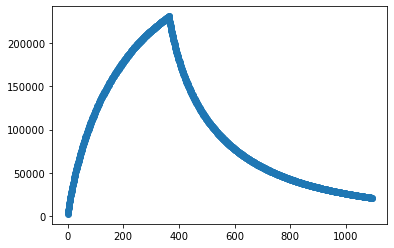

In [122]:
plt.scatter(np.arange(3*365), S)

In [123]:
np.argmax(S)

364

In [125]:
%%time
S=generateYearUsers(0.5,60,3000000,365*3)

CPU times: user 10.3 s, sys: 23.8 ms, total: 10.3 s
Wall time: 10.3 s


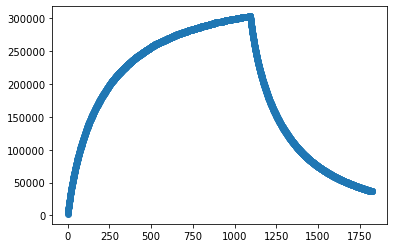

In [126]:
plt.scatter(np.arange(5*365), S)